# GoodReads Review to Rating Notebook

## I. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from pathlib import Path
from zipfile import ZipFile

## II. Prepare Data

### 1. Install kaggle and get data from Kaggle

In [2]:
## Install kaggle for data
%pip install -q kaggle

In [3]:
from google.colab import files 
file = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
kaggle_path = f"{os.getenv('HOME')}/.kaggle"
kaggle = Path(kaggle_path)
kaggle.mkdir(parents=True)


os.replace("kaggle.json", os.path.join(kaggle_path, "kaggle.json"))
os.chmod(os.path.join(kaggle_path, "kaggle.json"), 0o600)

In [5]:
! kaggle competitions download -c goodreads-books-reviews-290312

 97% 617M/635M [00:03<00:00, 168MB/s]
100% 635M/635M [00:03<00:00, 168MB/s]


### 2. Unzip and move data to its specific folders

In [6]:
zip_file = ZipFile("goodreads-books-reviews-290312.zip")
zip_file.extractall()

In [7]:
data_path = "data"
train_path = os.path.join(data_path, "train")
test_path = os.path.join(data_path, "test")

In [8]:
for path in (train_path, test_path):
  os.makedirs(path)

## Move train
os.replace("./goodreads_train.csv", os.path.join(train_path, "goodreads_train.csv"))
os.replace("./goodreads_test.csv", os.path.join(test_path, "goodreads_test.csv"))

### 3. Loading data

In [10]:
train_data = pd.read_csv(os.path.join(train_path, "goodreads_train.csv"))

In [11]:
train_data.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


## III. Data Exploration

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       900000 non-null  object
 1   book_id       900000 non-null  int64 
 2   review_id     900000 non-null  object
 3   rating        900000 non-null  int64 
 4   review_text   900000 non-null  object
 5   date_added    900000 non-null  object
 6   date_updated  900000 non-null  object
 7   read_at       808234 non-null  object
 8   started_at    625703 non-null  object
 9   n_votes       900000 non-null  int64 
 10  n_comments    900000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 75.5+ MB


There are 11 columns in the dataset with exactly 900000 comments. Most of the columns are not null, but there are still some null columns, such as `read_at`, `started_at`. There are some initial thoughts of why these are nulls, such as:
* The reviewers did not read the book but still give reviews.
* They may forget to update these information or may not want to give these information.


We will look at our data again to get some basic sense.

In [ ]:
train_data.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


We also check the columns of the dataset.

In [ ]:
train_data.columns

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text',
       'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes',
       'n_comments'],
      dtype='object')

Based on the columns and the dataset, we can safely assume that there are 2 types of data in the dataset: categorical data and the numerical data.

* Numerical data columns are: `n_votes`, `n_comments`.
* Categorical data columns are the remaining coumns: `rating`, `user_id`, `book_id`, `review_id`, `review_text`, `date_added`, `date_updated`, `read_at`, `started_at`


### 1. Initial Hypothesis

#### a) Reviewing process

We can start making some hypothesis after viewing the process to add a new review on GoodReads.
1. Login in to GoodReads to make a review. Anonymous and guest cannot do reviews. (`user_id`)
2. Access the book homepage. (`book_id`)
3. Rate the book. The rating scale is 0-5 stars with the interval size 1. (`rating`)
4. A "Add a review" modal is popped up. We can add our review here. (`review_text`)
5. We can also add some optional information such as mark the review as spoilers, started read date (`started_date`) and ended read date.
6. The review is added to the system (`review_id`) and the time the review is written is logged (`date_added`).
7. Other readers can view these comments and can like (`n_votes`) for the comment if they found it was helpful. Moreover, they can comment to the review to discuss their opinions and ideas (`n_comments`).
8. We can also update the review if we found it is unapproriate or out of date. The time we perform the update will be logged (`date_updated`).


#### b) Initiate hypothesis

- Most importants features are `review_text`, `n_votes`, and `n_comments` which are all numerical columns:
  + `n_votes` indicates how reputable the review is. People tends to upvote reviews that they find to be helpful rather than others. Therefore, <b>a higher `n_votes` value would lead to a more accuracy review.</b>
  + When `n_comments` is high, it means there are 2 cases:
    * The review is helpful and others comment to thank for the review.
    * The review is debatable and others comment to share their opinions.
    * => <b>High `n_votes` also means that the review's rating is accuracy.</b>


- After looking at some sample data, we notice that there are some promotion reviews. Therefore, another task for us is to build a review classifier to determine whether a review is spam (use to 5-star a book) or not. (This is out-of-scope of this notebook).

### 2. Numerical features

We can start by learning about the numerical features first. Let's look at some basic statistics.

In [ ]:
train_data[["n_votes", "n_comments"]].describe()

,n_votes,n_comments
count,900000.000000,900000.000000
mean,3.294381,1.016656
std,17.873553,5.963821
min,-3.000000,-1.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,0.000000
max,3222.000000,1335.000000


The `describe` table showed us many notable information:
* The `rating` column may be right-skewed as its Q3 is already the max rating (5.0 point or 5 stars)
* `n_votes` and `n_comments` are heavily left-skewed.
*  <b>ATTENTION</b>: `n_votes` 's min is -3, with is impossible. Goodreads does not have downvote feature.
*  <b>ATTENTION</b>: `n_comments` 's min is -1, with is also impossible. 


We will plot boxplots of the numerical columns to verify the first 2 thoughts.

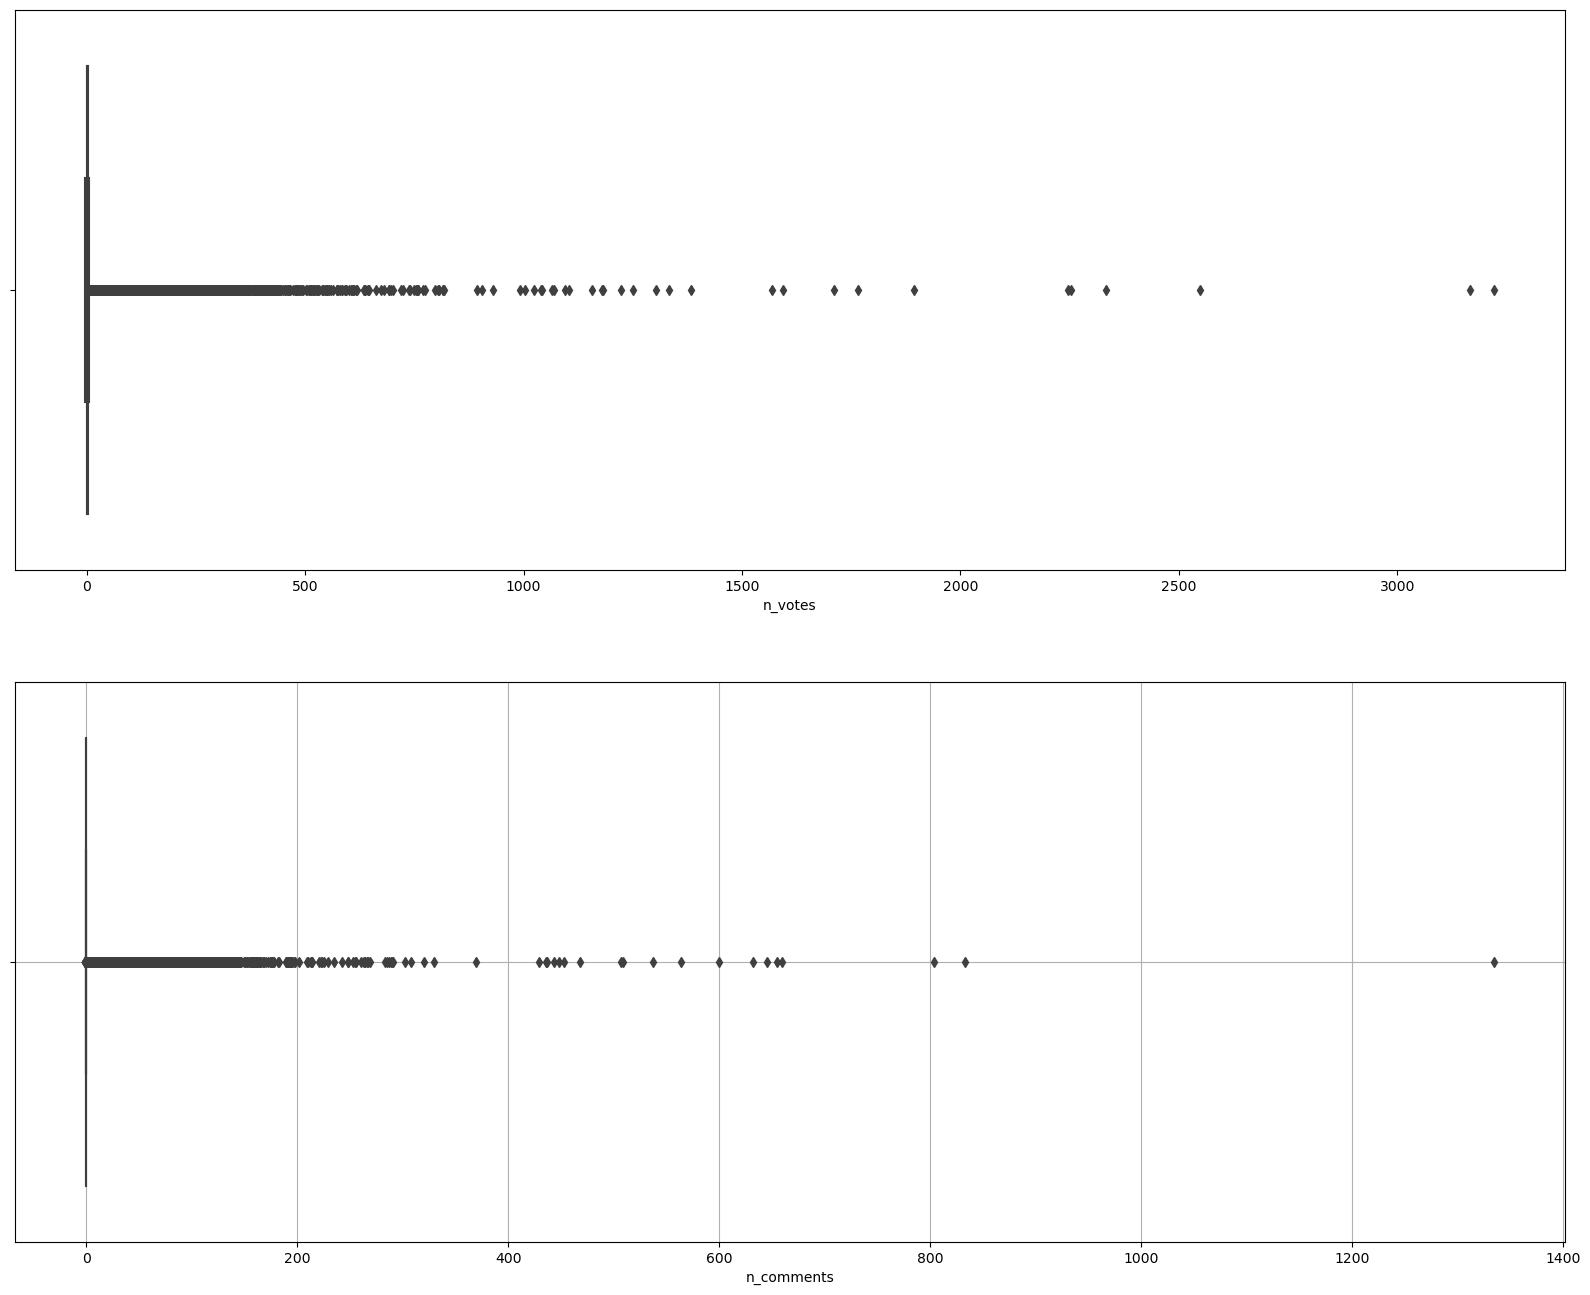

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,16))
sns.boxplot(data=train_data, x="n_votes", ax=ax[0])
sns.boxplot(data=train_data, x="n_comments", ax=ax[1])
plt.grid()

#### a) Rating

#### a) Number of votes

Since there are so many outliers in `n_comments` and `n_votes`, we would zoom in the plots where most of the comments and votes are.

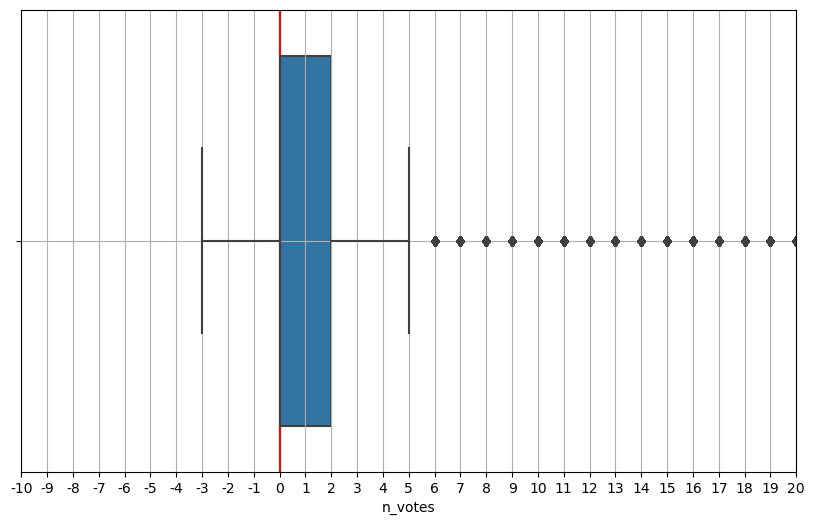

In [ ]:
plt.figure(figsize=(10,6))
ax1 = sns.boxplot(data=train_data, x="n_votes")
ax1.set(xlim=(-10,20))
ax1.axvline(x=train_data["n_votes"].median(), c='r')
ax1.set_xticks(range(-10, 21))
_ = ax1.set_xticklabels([str(label) for label in range(-10, 21)])
plt.grid()

This boxplot tells us that 
- Q1 and Q2 are coincident. (Red line indicates the data's median). Therefore, roughly 25% of the reviews has 0 votes.
- There is quite an amount of reviews has negative votes.


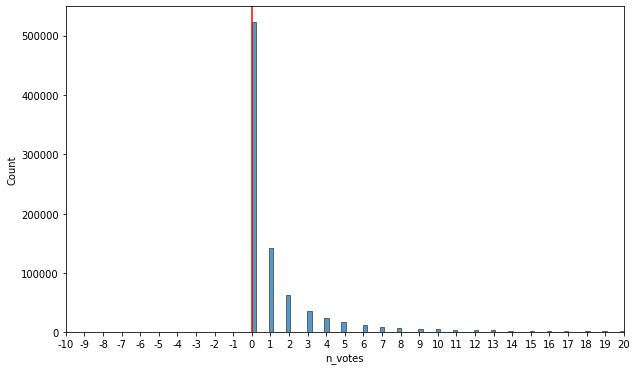

In [ ]:
plt.figure(figsize=(10,6))
ax1 = sns.histplot(x=train_data["n_votes"][train_data["n_votes"] < 21], bins=100)
ax1.set(xlim=(-10,20))
ax1.axvline(x=train_data["n_votes"].median(), c='r')
ax1.set_xticks(range(-10, 21))
_ = ax1.set_xticklabels([str(label) for label in range(-10, 21)])

Removing the negative votes reviews will make the distribution more like the geometry distribution (This is a discrete numerical feature).

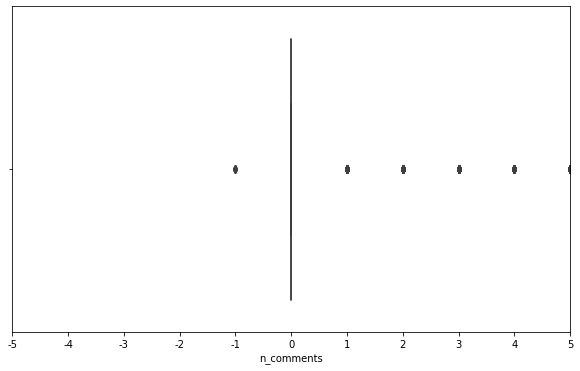

In [ ]:
plt.figure(figsize=(10,6))
ax1 = sns.boxplot(data=train_data, x="n_comments")
ax1.set(xlim=(-5,5))
ax1.set_xticks(range(-5, 6))
_ = ax1.set_xticklabels([str(label) for label in range(-5, 6)])

<AxesSubplot:xlabel='n_votes', ylabel='n_comments'>

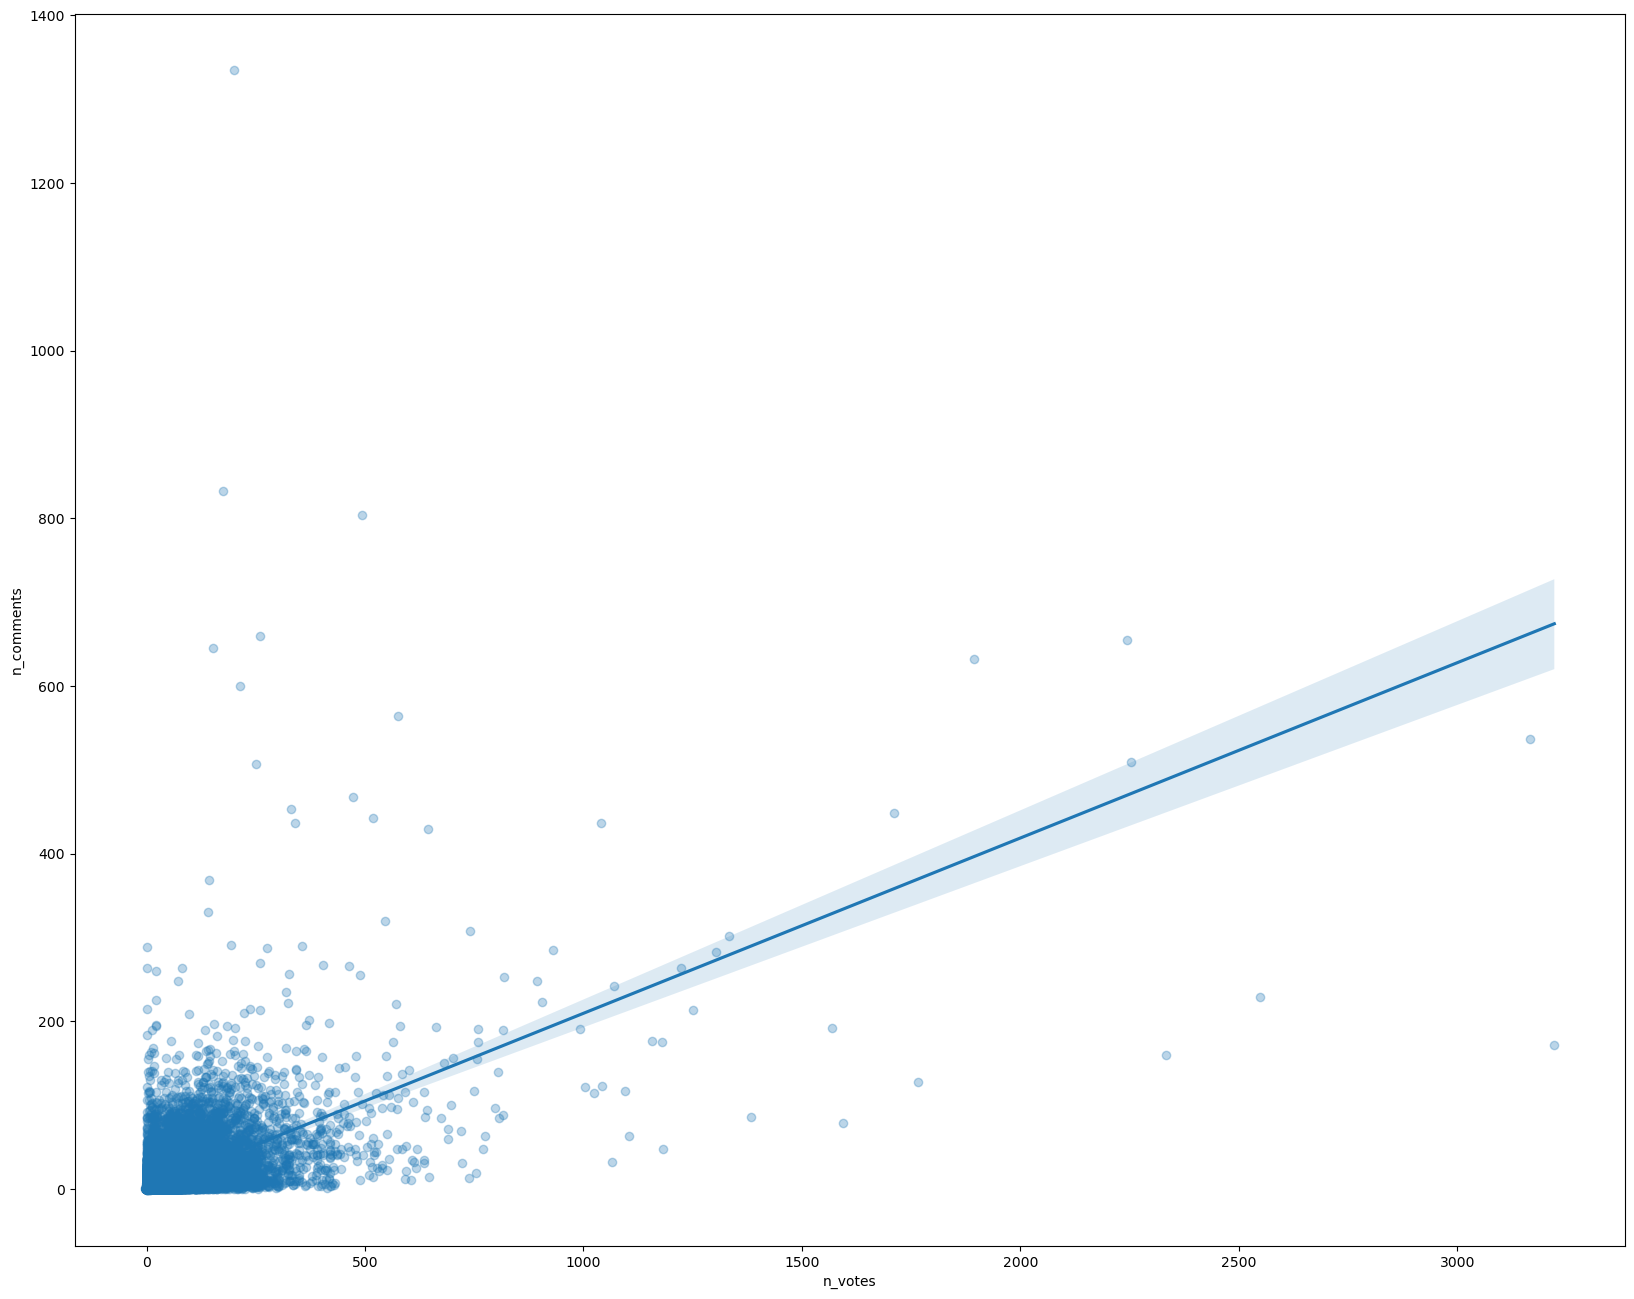

In [ ]:
plt.figure(figsize=(20,16))
sns.regplot(data=train_data,x="n_votes", y="n_comments", scatter_kws={"alpha":0.3})


`n_votes`'s median is somewhere

We can see that `n_votes` and `n_comments` have a lot of outliers. We may consider drop of those outliers or not. 

* Dropping outliers of `n_votes` is undesired, because highly upvotes reviews are likely to be more reputable than lower upvotes reviews, as other readers should find these reviews to be more helpful.

* We must investigate whether should we drop `n_comments` outliers. We may think that the larger `n_comments` is, the more arguable and debatable the review is. Another hypothesis is, that review is a helpful one, which indicates in an enormous gratefully comments.

In [ ]:
train_data[train_data["n_comments"] < 0]

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
13007,feafbae6a2cf100c84a712edd03e930d,1828067,aef92262bb2cda22247768affe7582b9,2,"I haven't had much luck finding new, entertain...",Mon Aug 20 08:45:24 -0700 2012,Mon Aug 20 09:14:14 -0700 2012,Sat Aug 18 00:00:00 -0700 2012,Fri Aug 17 00:00:00 -0700 2012,7,-1
13045,feafbae6a2cf100c84a712edd03e930d,17645,29a5a6522bfc6496ec5a55efedcceef6,3,I finished rereading this and found it conside...,Thu Dec 04 15:29:13 -0800 2008,Sun Jul 26 19:29:33 -0700 2015,Wed Jul 04 00:00:00 -0700 2012,Wed Jul 04 00:00:00 -0700 2012,2,-1
157212,06e1a327fd336d7eee74aa62f1275386,12031532,c1a21535a8c1c180fc5296b47dbc9a78,3,Sometimes it hurts to give a book three stars....,Wed Nov 07 04:20:45 -0800 2012,Mon Nov 19 18:35:57 -0800 2012,Mon Nov 19 00:00:00 -0800 2012,Wed Nov 07 00:00:00 -0800 2012,4,-1
229164,b0ed09d14a462cb2d27327b87edf6f68,13049688,ea18fbf5e281ac1b2651afded38406d9,1,"Not feeling this one. I don't mind dark, but t...",Wed Mar 27 12:52:09 -0700 2013,Fri Nov 25 08:50:17 -0800 2016,NaN,Wed Mar 27 00:00:00 -0700 2013,1,-1
570065,3687fcc87a9c2d733df8cfc43ae8dcfe,26860475,9235c340d5beef19271ba880c9db559b,4,The review is for Life and Death only. \n 3.5/...,Tue Oct 06 16:01:41 -0700 2015,Sun Aug 20 10:41:24 -0700 2017,Fri Oct 09 00:00:00 -0700 2015,Tue Oct 06 00:00:00 -0700 2015,6,-1
622493,26b6d2e8d2c2e2f76a70a3359ba76c6a,17572903,bbcd01ffb27e53927825506ad3346ad5,4,My new historical fiction interest is WWI. \n ...,Wed Jul 31 16:46:13 -0700 2013,Tue Feb 11 20:31:08 -0800 2014,Wed Jul 31 00:00:00 -0700 2013,NaN,9,-1
796721,f2caf50868a530b15ecbb9b3273837e7,13163011,5c237482cc755b72364778bc85b59ce2,3,Enjoyed this more than the first in that the s...,Thu Aug 16 13:45:54 -0700 2012,Mon Aug 20 12:44:08 -0700 2012,Mon Aug 20 12:44:08 -0700 2012,Thu Aug 16 00:00:00 -0700 2012,1,-1
796728,f2caf50868a530b15ecbb9b3273837e7,4912857,aa057f840d2b35d8551c870299e71fc2,4,"Sometimes when I REALLY enjoy a book, I have t...",Thu Jun 28 10:55:02 -0700 2012,Thu Jul 26 09:06:06 -0700 2012,Wed Jul 11 00:00:00 -0700 2012,Thu Jun 28 00:00:00 -0700 2012,0,-1


#### a) Rating

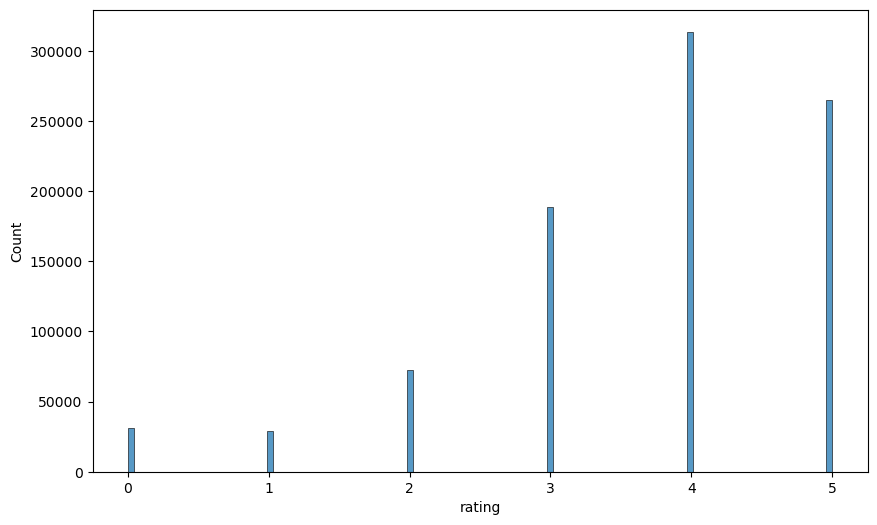

In [ ]:
plt.figure(figsize=(10,6))
ax1 = sns.histplot(data=train_data, x="rating")

The rating distribution in our dataset is not nearly uniform. In fact, it is right-skewed (most reviews are rated 4-5 stars). Since we are using review text to predict the ratings, this can impact our model to be likely to predict 4-5 stars than 0-2 stars.

One solution for this is to use Stratified Sampling based on rating.


In [ ]:
dtypes = {"review_id": str, "review_text": str, "n_votes": np.int8, "n_comments" : np.int8, "rating":np.int8}

In [ ]:
train_data = pd.read_csv(os.path.join(train_path, "goodreads_train.csv"), usecols=["review_id", "review_text", "n_votes", "n_comments", "rating"],dtype=dtypes)

In [12]:
train_pos = train_data[(train_data["n_votes"] >= 0) & (train_data["n_comments"] >= 0)]

In [ ]:
del(train_data)

In [ ]:
train_pos.describe()

,book_id,rating,n_votes,n_comments
count,8.999460e+05,899946.000000,899946.000000,899946.000000
mean,1.344156e+07,3.689627,3.294608,1.016699
std,9.357928e+06,1.252577,17.874058,5.963990
min,1.000000e+00,0.000000,0.000000,0.000000
25%,6.340471e+06,3.000000,0.000000,0.000000
50%,1.344502e+07,4.000000,0.000000,0.000000
75%,2.057897e+07,5.000000,2.000000,0.000000
max,3.632868e+07,5.000000,3222.000000,1335.000000


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.9)

In [14]:
for train_index, test_index in sss.split(train_pos.drop("rating", axis=1), train_pos["rating"]):
  df_train, df_test = train_pos.iloc[train_index], train_pos.iloc[test_index]


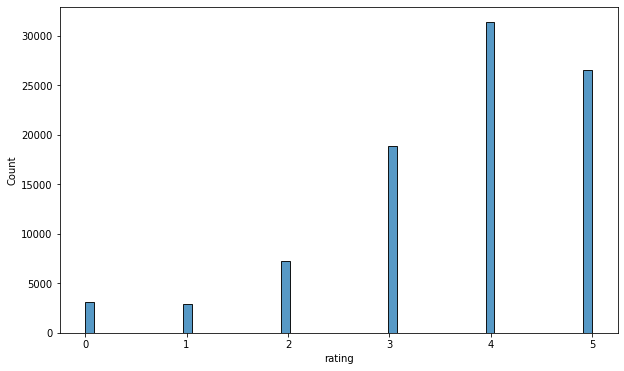

In [15]:
plt.figure(figsize=(10,6))
ax1 = sns.histplot(data=df_train, x="rating")

In [16]:
from fastai.text.all import *

In [17]:
dls = TextDataLoaders.from_df(df=df_train, text_col="review_text", label_col="rating")
dls.show_batch(max_n=3)

,text,category
0,"xxbos h xxrep 5 o ly shit , what was xxup that . \n▁ i thought xxmaj i 'd be able to write something , but i ca n't . xxmaj it 's gon na need another reread , and a long think . \n▁ xxmaj suffice it to say you need to pick this up , and you absolutely have no idea what you 're getting yourself into when you do . \n▁ -- \n▁ i do n't know how to comment on the book any further unless i take notes while i go , which is pretty much how i use xxmaj goodreads half the time anyway . i feel a little bad about it this time around because xxmaj wrenchies is so new , so as much as it feels xxunk silly xxmaj i 'll bracket off my notes as spoilers . xxmaj lame . \n▁ (",5
1,"xxbos xxmaj short and xxmaj sweet xxmaj version \n▁ xxmaj an epic romance on par with xxmaj gone xxmaj with the xxmaj wind that features a feisty female lead . xxmaj it made for a great discussion in my book club since it brought up social and women 's issues . xxmaj the western setting and the journal - style story telling made it an unforgettable read . \n▁ xxmaj jessica xxmaj thinks xxmaj too xxmaj much xxmaj version \n▁ ( view spoiler ) [ \n▁ xxmaj these is xxmaj my xxmaj words is an epic western romance starring a wonderful and strong female lead named xxmaj sarah . xxmaj she reminded me a lot of xxmaj scarlett o'hara from xxmaj gone with the xxmaj wind . xxmaj but i have to say as much as i like xxmaj scarlett , i think xxmaj sarah has a few things that",5
2,"xxbos { this review originally appeared on xxmaj clear xxmaj eyes , xxmaj full xxmaj shelves . } \n▁ … she realized she wanted more . xxmaj not a husband or a bunch of kids burping on her clothes … but a life . a real one . a chance to figure out who she was … \n▁ xxmaj when i read that xxmaj molly o'keefe 's main character in xxmaj ca n't xxmaj buy xxmaj me xxmaj love was inspired by xxmaj tyra xxmaj collette from xxmaj friday xxmaj night xxmaj lights ( "" tyra times 10 "" is how she referred to her ) , i immediately set aside my deeply - held philosophical objection to images of creepy waxed man chests * to check out her take on one of my favorite fictional characters . xxmaj what i found in xxmaj ca n't xxmaj buy xxmaj me",4


In [33]:
dls.categorize.vocab.map_objs([0,1,2,3,4,5])

(#6) [0,1,2,3,4,5]

In [36]:
learn = text_classifier_learner(dls, AWD_LSTM, metrics=F1Score(average="macro"))

In [37]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,f1_score,time
0,1.315788,1.283949,0.280496,05:26


epoch,train_loss,valid_loss,f1_score,time
0,1.232067,1.173887,0.377433,13:21
1,1.172466,1.127500,0.413495,13:21
2,1.098540,1.078235,0.436635,13:20
3,1.065581,1.037366,0.445887,13:21
4,1.003647,1.019784,0.454622,13:19
5,0.956027,1.005440,0.476139,13:19
6,0.965376,0.998689,0.490640,13:19


epoch,train_loss,valid_loss,f1_score,time
0,1.232067,1.173887,0.377433,13:21
1,1.172466,1.127500,0.413495,13:21
2,1.098540,1.078235,0.436635,13:20
3,1.065581,1.037366,0.445887,13:21
4,1.003647,1.019784,0.454622,13:19
5,0.956027,1.005440,0.476139,13:19
6,0.965376,0.998689,0.490640,13:19
7,0.916313,0.994604,0.496359,13:20
8,0.901774,0.998636,0.501177,13:21
9,0.908289,0.997481,0.495486,13:20


In [38]:
learn.show_results()

,text,category,category_
0,"xxbos xxmaj when i try to capture in words the adventures in reading that i had in 2015 , i feel flummoxed at where to start . a tally of books read ? xxmaj list by genre ? xxmaj success / failure of reading challenges ? xxmaj in years pasts , those were my go to places for wrap ups , but xxmaj i 'm not feeling like that 's what this year was about to me . xxmaj even a favourites list feels so subjective and personal , i wonder at the value of sharing it . i did decide to do a favourite lists , but before i get to that i thought i would share some learnings that reading brought to me this year . \n▁ i feel like xxmaj i 've managed a good balance between expanding my reading horizons and enjoyment reading this year .",5,4
1,"xxbos xxmaj gone xxmaj with the xxmaj wind is pretty cool , except for all the racism ! \n▁ xxmaj of course , you could say that about the xxmaj old xxmaj south in general , and look where that got them . xxmaj spoiler , it got their asses kicked because they were hateful fucks who absolutely refused to stop enslaving millions of people and 70 years later in 1936 here 's xxmaj margaret xxmaj mitchell whining about it for a thousand pages . xxmaj if you 'd like to hear why slavery was terrific and black people are inferior to whites and they liked being slaves , here is your epic . xxmaj if that sounds unpleasant , you 're not going to like xxmaj gone xxmaj with the xxmaj wind . \n▁ a non - racist book can have racist characters , and all the characters in",1,1
2,"xxbos * * spoiler alert * * \n▁ xxmaj two - second recap : xxmaj if you 're interested in xxup ya at all , you 've probably heard about the buzz surrounding xxmaj all xxmaj our xxmaj yesterdays . \n▁ xxmaj cristin xxmaj terrill 's debut novel is a spectacular book that everyone will be talking about in the fall , and you do n't want to be left out . xxmaj so buy it . xxmaj you 'll thank me later . \n▁ xxrep 3 * \n▁ xxmaj full review : \n▁ xxmaj there are some books that are so flawlessly written , that you 'll likely end up thinking back to the very first time you heard about the book . \n▁ xxmaj cristin xxmaj terrill 's xxmaj all xxmaj our xxmaj yesterdays is definitely one of those books . xxmaj the first time i heard about",5,4
3,"xxbos xxmaj it breaks my heart a little to not rate a xxmaj harry xxmaj potter related book 5 - stars , but i ca n't bring myself to give this 5 - stars . xxmaj in fact , if xxmaj i 'm being entirely honest , this is closer to a 2 - star book than a 3 - star , like a xxunk - star book , but we 'll round up because this series means so much to me - xxmaj i 'd be perfectly content with reading 300 - pages of xxmaj hermione 's lecture notes on xxmaj professor xxmaj xxunk discussing self - stirring xxunk . \n▁ xxmaj this was without a doubt my most anticipated read of 2016 . xxmaj there has been a void in my life with the absence of new xxmaj harry xxmaj potter books . xxmaj so perhaps i built",3,4
4,"xxbos "" my name is xxmaj aelin xxmaj ashryver xxmaj galathynius … \n▁ xxmaj and i will not be afraid . "" \n▁ xxrep 11 _ \n▁ xxmaj empire of xxmaj storms was , quite possibly , my favourite book of this year , almost topping xxmaj lady xxmaj midnight and xxmaj nevernight . xxmaj the xxmaj throne of xxmaj glass books are purely astounding ; all of them add to xxmaj aelin 's storyline and it brings such joy to my soul to see my favourite characters grow up and mature as things go on , as xxmaj erawan 's dark army builds upon book by book . xxmaj this instalment in the series was a particularly emotional one , and frankly , i am ruined by heart and broken soul by the last few chapters . \n▁ xxmaj you know a book is good when your head is",5,5
5,"xxbos xxmaj trying to remember the very first books i was introduced to , i remember reading xxmaj the xxmaj royal xxmaj diaries sometime in my childhood . i remember reading a few of them such as xxmaj elizabeth xxup i , xxmaj marie xxmaj antoinette , and xx

In [40]:
learn.predict("I don't like that book!")

('5', tensor(5), tensor([0.0305, 0.1736, 0.0589, 0.0496, 0.1085, 0.5790]))

In [41]:
learn.export("review.pkl")

KeyboardInterrupt: ignored

In [ ]:
!ls -al 


total 819924
drwxr-xr-x 1 root root      4096 Nov  9 03:50 .
drwxr-xr-x 1 root root      4096 Nov  9 03:14 ..
drwxr-xr-x 4 root root      4096 Nov  7 14:36 .config
drwxr-xr-x 4 root root      4096 Nov  9 03:38 data
-rw-r--r-- 1 root root 665360857 Nov  9 03:38 goodreads-books-reviews-290312.zip
-rw-r--r-- 1 root root  16731172 Nov  9 03:38 goodreads_sample_submission.csv
-rw-r--r-- 1 root root        65 Nov  9 03:38 kaggle.json
-rw-r--r-- 1 root root 157477811 Nov  9 03:50 review.pkl
drwxr-xr-x 1 root root      4096 Nov  7 14:37 sample_data
